In [1]:
import re
import unicodedata
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import prep

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1', usecols=[0,1])
df.columns = ['label', 'text']

In [3]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df['text_cleaned'] = df.text.apply(prep.basic_clean)

In [5]:
df.head()

,label,text,text_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [6]:
df['text_tokenized'] = df.text_cleaned.apply(prep.tokenize)
df.head()

,label,text,text_cleaned,text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...


In [7]:
df['text_lemmatized'] = df.text_tokenized.apply(prep.lemmatize)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...


In [8]:
df['text_filtered'] = df.text_lemmatized.apply(prep.remove_stopwords)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though


In [9]:
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.text_filtered]
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)

In [10]:
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]"


In [11]:
ham_words = ' '.join(df[df.label=='ham'].text_filtered)
spam_words = ' '.join(df[df.label=='spam'].text_filtered)
all_words = ' '.join(df.text_filtered)

ham_words = re.sub(r'\s.\s', '', ham_words)
spam_words = re.sub(r'\s.\s', '', spam_words)
all_words = re.sub(r'\s.\s', '', all_words)

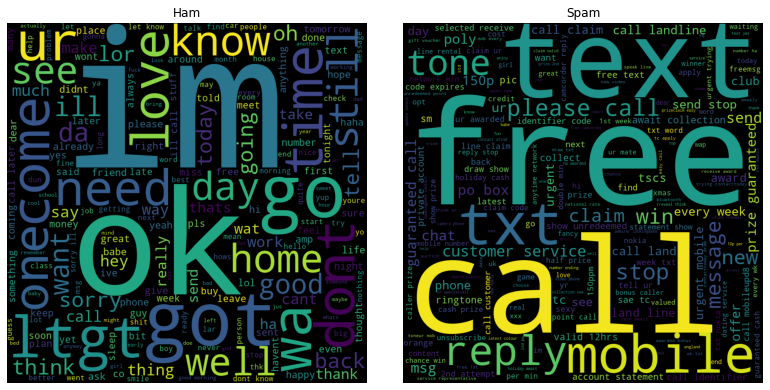

In [12]:
from wordcloud import WordCloud

ham_cloud = WordCloud(background_color='black', 
                      height=800, width=800).generate(ham_words)

spam_cloud = WordCloud(background_color='black', 
                      height=800, width=800).generate(spam_words)


plt.figure(figsize=(10,10))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

axs[0].imshow(ham_cloud)
axs[1].imshow(spam_cloud)

axs[0].set_title('Ham')
axs[1].set_title('Spam')

for ax in axs: ax.axis('off')

In [13]:
df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in df.words]
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,bigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...","[(go, jurong), (jurong, point), (point, crazy)..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]","[(ok, lar), (lar, joking), (joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...","[(free, entrywkly), (entrywkly, comp), (comp, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]","[(u, dun), (dun, say), (say, early), (early, h..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]","[(nah, dont), (dont, think), (think, go), (go,..."


In [14]:
df['trigrams'] = [list(nltk.ngrams(wordlist, 3)) for wordlist in df.words]
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,bigrams,trigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...","[(go, jurong), (jurong, point), (point, crazy)...","[(go, jurong, point), (jurong, point, crazy), ..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]","[(ok, lar), (lar, joking), (joking, wifoni)]","[(ok, lar, joking), (lar, joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...","[(free, entrywkly), (entrywkly, comp), (comp, ...","[(free, entrywkly, comp), (entrywkly, comp, wi..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]","[(u, dun), (dun, say), (say, early), (early, h...","[(u, dun, say), (dun, say, early), (say, early..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]","[(nah, dont), (dont, think), (think, go), (go,...","[(nah, dont, think), (dont, think, go), (think..."


In [15]:
df['fourgrams'] = [list(nltk.ngrams(wordlist, 4)) for wordlist in df.words]
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,bigrams,trigrams,fourgrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...","[(go, jurong), (jurong, point), (point, crazy)...","[(go, jurong, point), (jurong, point, crazy), ...","[(go, jurong, point, crazy), (jurong, point, c..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]","[(ok, lar), (lar, joking), (joking, wifoni)]","[(ok, lar, joking), (lar, joking, wifoni)]","[(ok, lar, joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...","[(free, entrywkly), (entrywkly, comp), (comp, ...","[(free, entrywkly, comp), (entrywkly, comp, wi...","[(free, entrywkly, comp, win), (entrywkly, com..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]","[(u, dun), (dun, say), (say, early), (early, h...","[(u, dun, say), (dun, say, early), (say, early...","[(u, dun, say, early), (dun, say, early, horc)..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]","[(nah, dont), (dont, think), (think, go), (go,...","[(nah, dont, think), (dont, think, go), (think...","[(nah, dont, think, go), (dont, think, go, usf..."


In [16]:
ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts().head(25)
spam_bigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 2))).value_counts().head(25)
ham_trigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 3))).value_counts().head(25)
spam_trigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 3))).value_counts().head(25)
ham_fourgrams = pd.Series(list(nltk.ngrams(ham_words.split(), 4))).value_counts().head(25)
spam_fourgrams = pd.Series(list(nltk.ngrams(spam_words.split(), 4))).value_counts().head(25)

In [17]:
ham_bigrams

(call, later)      47
(ill, call)        45
(let, know)        41
(sorry, ill)       39
(dont, know)       32
(good, morning)    31
(new, year)        26
(pls, send)        22
(im, going)        22
(take, care)       21
(good, night)      19
(ok, lor)          19
(ltgt, min)        19
(im, gonna)        19
(last, night)      18
(hi, hi)           18
(great, day)       17
(happy, new)       15
(like, ltgt)       14
(send, message)    14
(pick, phone)      13
(dont, think)      13
(want, go)         13
(cant, pick)       13
(dont, want)       12
dtype: int64

In [18]:
spam_bigrams

(please, call)          42
(customer, service)     27
(po, box)               23
(guaranteed, call)      23
(1000, cash)            22
(prize, guaranteed)     22
(send, stop)            19
(every, week)           19
(await, collection)     18
(urgent, mobile)        18
(land, line)            18
(show, 800)             18
(valid, 12hrs)          17
(claim, call)           16
(account, statement)    16
(sae, tc)               16
(reply, call)           15
(call, customer)        15
(call, mobileupd8)      15
(call, 08000930705)     15
(selected, receive)     15
(identifier, code)      15
(draw, show)            14
(tell, ur)              14
(week, txt)             14
dtype: int64

In [19]:
ham_trigrams

(sorry, ill, call)                 38
(ill, call, later)                 38
(happy, new, year)                 13
(phone, right, pls)                12
(pick, phone, right)               12
(cant, pick, phone)                12
(right, pls, send)                 12
(pls, send, message)               12
(hi, hi, hi)                       11
(good, morning, dear)               7
(pls, convey, birthday)             6
(convey, birthday, wish)            6
(kiss, across, sea)                 6
(goodmorning, today, late)          5
(cameminuts, latr, wid)             5
(wish, parent, forgotkid)           5
(presscopy, friend, callertune)     5
(bedroom, minute, ok)               5
(man, last, week)                   5
(last, week, wa)                    5
(didnt, wish, parent)               5
(even, colleague, wish)             5
(askdlunch, lunch, invited)         5
(ok, sed, sexy)                     5
(work, even, colleague)             5
dtype: int64

In [20]:
spam_trigrams

(prize, guaranteed, call)              21
(call, customer, service)              15
(land, line, claim)                    14
(2003, account, statement)             13
(private, 2003, account)               13
(reply, call, 08000930705)             13
(guaranteed, 1000, cash)               12
(show, 800, unredeemed)                12
(camcorder, reply, call)               12
(anytime, network, min)                11
(bonus, caller, prize)                 11
(every, week, txt)                     11
(customer, service, representative)    10
(1000, cash, 2000)                     10
(please, call, customer)               10
(cash, await, collection)              10
(2000, bonus, caller)                  10
(750, anytime, network)                 9
(2000, prize, guaranteed)               9
(receive, 350, award)                   9
(free, 1st, week)                       9
(mob, every, week)                      9
(urgent, mobile, number)                9
(txt, music, 87066)               

In [21]:
ham_fourgrams

(sorry, ill, call, later)                  34
(pick, phone, right, pls)                  12
(phone, right, pls, send)                  12
(cant, pick, phone, right)                 12
(right, pls, send, message)                11
(hi, hi, hi, hi)                            6
(pls, convey, birthday, wish)               6
(sed, sexy, mood, cameminuts)               5
(special, askdlunch, lunch, invited)        5
(saidmind, go, bedroom, minute)             5
(entered, cabin, pa, said)                  5
(went, work, even, colleague)               5
(bday, wife, didnt, wish)                   5
(go, bedroom, minute, ok)                   5
(pa, said, happy, bday)                     5
(cameminuts, latr, wid, caken)              5
(minute, ok, sed, sexy)                     5
(callertune, caller, presscopy, friend)     5
(bday, bos, felt, special)                  5
(wish, parent, forgotkid, went)             5
(wife, didnt, wish, parent)                 5
(caller, presscopy, friend, caller

In [22]:
spam_fourgrams

(private, 2003, account, statement)          13
(2000, bonus, caller, prize)                 10
(please, call, customer, service)            10
(call, customer, service, representative)    10
(camcorder, reply, call, 08000930705)        10
(trying, contacttoday, draw, show)            9
(800, unredeemed, point, call)                9
(toneur, mob, every, week)                    9
(draw, txt, music, 87066)                     9
(2000, prize, guaranteed, call)               9
(750, anytime, network, min)                  9
(mob, every, week, txt)                       9
(show, 800, unredeemed, point)                9
(rreveal, think, ur, specialcall)             8
(mobile, number, ha, awarded)                 8
(lookingmake, contact, ufind, rreveal)        8
(await, collection, sae, tc)                  8
(urgent, mobile, number, ha)                  8
(admirer, lookingmake, contact, ufind)        8
(cash, await, collection, sae)                8
(urgent, trying, contacttoday, draw)    

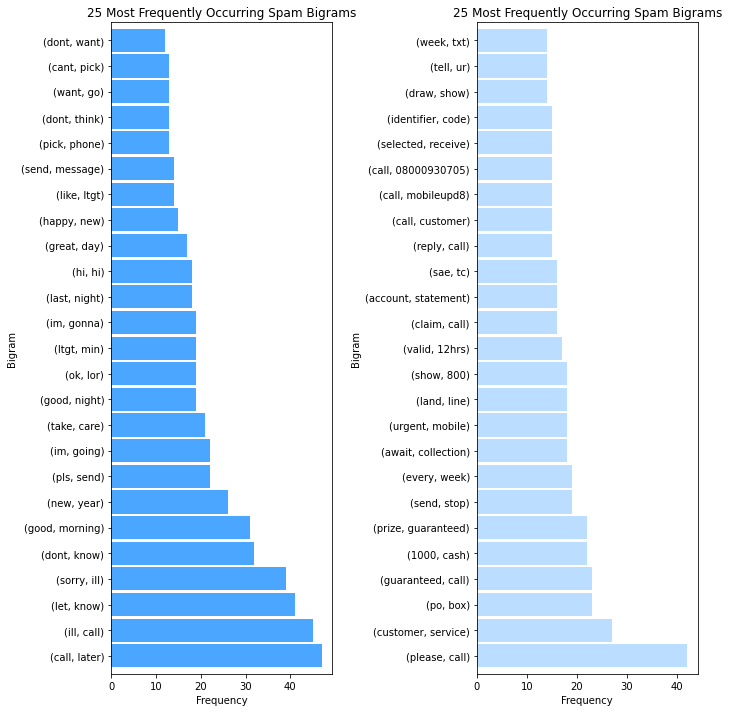

In [23]:
plt.subplot(121)
ham_bigrams.plot.barh(color='dodgerblue', width=.9, figsize=(10, 10), alpha=.8)
plt.title('25 Most Frequently Occurring Spam Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(122)
spam_bigrams.plot.barh(color='dodgerblue', width=.9, figsize=(10, 10), alpha=.3)
plt.title('25 Most Frequently Occurring Spam Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

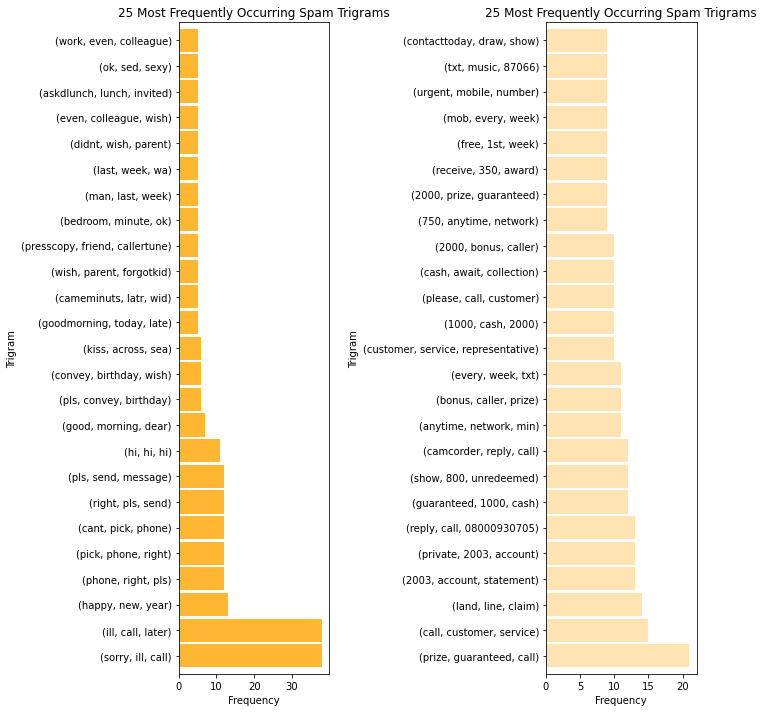

In [24]:
plt.subplot(121)
ham_trigrams.plot.barh(color='orange', width=.9, figsize=(10, 10), alpha=.8)
plt.title('25 Most Frequently Occurring Spam Trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')

plt.subplot(122)
spam_trigrams.plot.barh(color='orange', width=.9, figsize=(10, 10), alpha=.3)
plt.title('25 Most Frequently Occurring Spam Trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

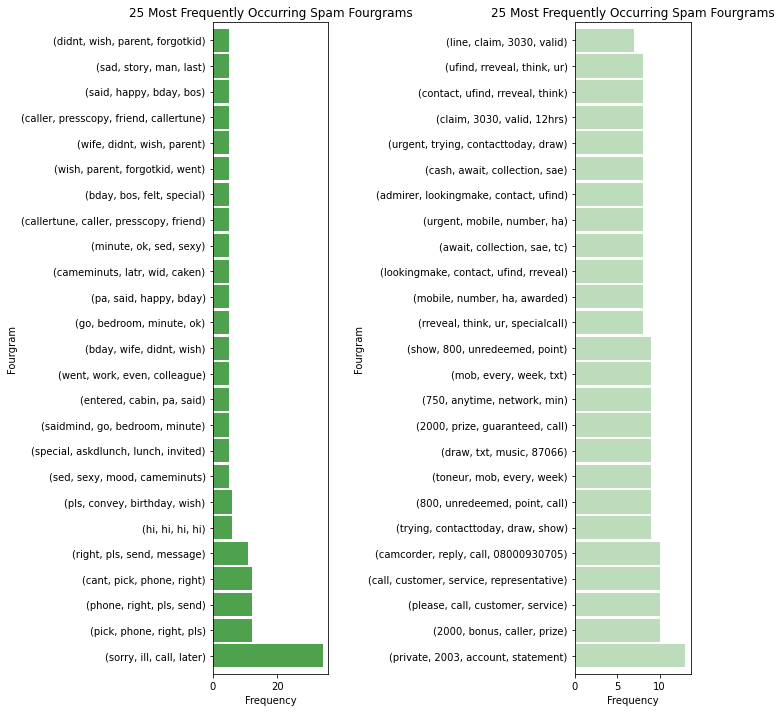

In [25]:
plt.subplot(121)
ham_fourgrams.plot.barh(color='forestgreen', width=.9, figsize=(10, 10), alpha=.8)
plt.title('25 Most Frequently Occurring Spam Fourgrams')
plt.ylabel('Fourgram')
plt.xlabel('Frequency')

plt.subplot(122)
spam_fourgrams.plot.barh(color='forestgreen', width=.9, figsize=(10, 10), alpha=.3)
plt.title('25 Most Frequently Occurring Spam Fourgrams')
plt.ylabel('Fourgram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

{'sorry ill call later': 34, 'pick phone right pls': 12, 'phone right pls send': 12, 'cant pick phone right': 12, 'right pls send message': 11, 'hi hi hi hi': 6, 'pls convey birthday wish': 6, 'sed sexy mood cameminuts': 5, 'special askdlunch lunch invited': 5, 'saidmind go bedroom minute': 5, 'entered cabin pa said': 5, 'went work even colleague': 5, 'bday wife didnt wish': 5, 'go bedroom minute ok': 5, 'pa said happy bday': 5, 'cameminuts latr wid caken': 5, 'minute ok sed sexy': 5, 'callertune caller presscopy friend': 5, 'bday bos felt special': 5, 'wish parent forgotkid went': 5, 'wife didnt wish parent': 5, 'caller presscopy friend callertune': 5, 'said happy bday bos': 5, 'sad story man last': 5, 'didnt wish parent forgotkid': 5}


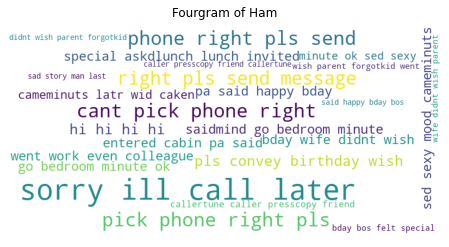

In [26]:
hfg = {k[0] + ' ' + k[1] + ' ' + k[2] + ' ' + k[3]: v for k, v in ham_fourgrams.to_dict().items()}
img1 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(hfg)
plt.figure(figsize=(8, 4))
plt.imshow(img1)
plt.title('Fourgram of Ham')
plt.axis('off')
print(hfg)

{'sorry ill call': 38, 'ill call later': 38, 'happy new year': 13, 'phone right pls': 12, 'pick phone right': 12, 'cant pick phone': 12, 'right pls send': 12, 'pls send message': 12, 'hi hi hi': 11, 'good morning dear': 7, 'pls convey birthday': 6, 'convey birthday wish': 6, 'kiss across sea': 6, 'goodmorning today late': 5, 'cameminuts latr wid': 5, 'wish parent forgotkid': 5, 'presscopy friend callertune': 5, 'bedroom minute ok': 5, 'man last week': 5, 'last week wa': 5, 'didnt wish parent': 5, 'even colleague wish': 5, 'askdlunch lunch invited': 5, 'ok sed sexy': 5, 'work even colleague': 5}


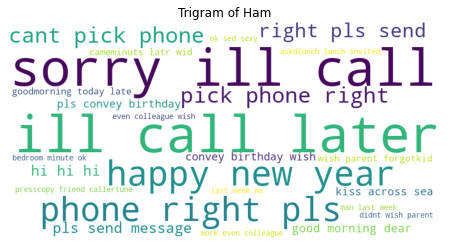

In [27]:
htg = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in ham_trigrams.to_dict().items()}
img2 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(htg)
plt.figure(figsize=(8, 4))
plt.imshow(img2)
plt.title('Trigram of Ham')
plt.axis('off')
print(htg)

{'call later': 47, 'ill call': 45, 'let know': 41, 'sorry ill': 39, 'dont know': 32, 'good morning': 31, 'new year': 26, 'pls send': 22, 'im going': 22, 'take care': 21, 'good night': 19, 'ok lor': 19, 'ltgt min': 19, 'im gonna': 19, 'last night': 18, 'hi hi': 18, 'great day': 17, 'happy new': 15, 'like ltgt': 14, 'send message': 14, 'pick phone': 13, 'dont think': 13, 'want go': 13, 'cant pick': 13, 'dont want': 12}


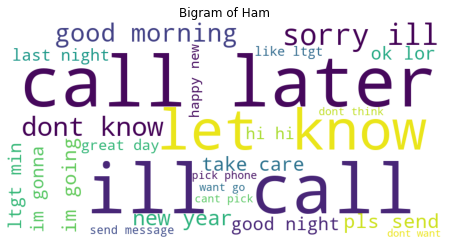

In [28]:
hbg = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
img3 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(hbg)
plt.figure(figsize=(8, 4))
plt.imshow(img3)
plt.title('Bigram of Ham')
plt.axis('off')
print(hbg)

In [29]:
blogs = pd.read_json('blogs.json')
blogs.head()

,title,body
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...


In [30]:
blog_df = prep.prep_article_data(blogs, 'body', extra_words=[], exclude_words=[])

In [31]:
blog_df.head()

,title,body,stemmed,lemmatized,clean
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time arrived codeup officially open...
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoni and maggi giust data scienc ...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoni a week ago codeup launch our...,by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair the third biannual san antoni...,sa tech job fair the third biannual san antoni...,sa tech job fair third biannual san antonio te...
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...


In [32]:
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in blog_df.clean]
blog_df = pd.concat([blog_df, pd.DataFrame({'words': words})], axis=1)

In [33]:
blog_df

,title,body,stemmed,lemmatized,clean,words
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time arrived codeup officially open...,"[rumor, true, time, arrived, codeup, officiall..."
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoni and maggi giust data scienc ...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...,"[dimitri, antoniou, maggie, giust, data, scien..."
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoni a week ago codeup launch our...,by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...,"[dimitri, antoniou, week, ago, codeup, launche..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair the third biannual san antoni...,sa tech job fair the third biannual san antoni...,sa tech job fair third biannual san antonio te...,"[sa, tech, job, fair, third, biannual, san, an..."
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,"[competitor, bootcamps, closing, model, danger..."


In [34]:
blog_df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in blog_df.words]
blog_df.head()

,title,body,stemmed,lemmatized,clean,words,bigrams
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time arrived codeup officially open...,"[rumor, true, time, arrived, codeup, officiall...","[(rumor, true), (true, time), (time, arrived),..."
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoni and maggi giust data scienc ...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...,"[dimitri, antoniou, maggie, giust, data, scien...","[(dimitri, antoniou), (antoniou, maggie), (mag..."
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoni a week ago codeup launch our...,by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...,"[dimitri, antoniou, week, ago, codeup, launche...","[(dimitri, antoniou), (antoniou, week), (week,..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair the third biannual san antoni...,sa tech job fair the third biannual san antoni...,sa tech job fair third biannual san antonio te...,"[sa, tech, job, fair, third, biannual, san, an...","[(sa, tech), (tech, job), (job, fair), (fair, ..."
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,"[competitor, bootcamps, closing, model, danger...","[(competitor, bootcamps), (bootcamps, closing)..."


In [35]:
blog_df['trigrams'] = [list(nltk.ngrams(wordlist, 3)) for wordlist in blog_df.words]
blog_df.head()

,title,body,stemmed,lemmatized,clean,words,bigrams,trigrams
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time arrived codeup officially open...,"[rumor, true, time, arrived, codeup, officiall...","[(rumor, true), (true, time), (time, arrived),...","[(rumor, true, time), (true, time, arrived), (..."
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoni and maggi giust data scienc ...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...,"[dimitri, antoniou, maggie, giust, data, scien...","[(dimitri, antoniou), (antoniou, maggie), (mag...","[(dimitri, antoniou, maggie), (antoniou, maggi..."
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoni a week ago codeup launch our...,by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...,"[dimitri, antoniou, week, ago, codeup, launche...","[(dimitri, antoniou), (antoniou, week), (week,...","[(dimitri, antoniou, week), (antoniou, week, a..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair the third biannual san antoni...,sa tech job fair the third biannual san antoni...,sa tech job fair third biannual san antonio te...,"[sa, tech, job, fair, third, biannual, san, an...","[(sa, tech), (tech, job), (job, fair), (fair, ...","[(sa, tech, job), (tech, job, fair), (job, fai..."
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,"[competitor, bootcamps, closing, model, danger...","[(competitor, bootcamps), (bootcamps, closing)...","[(competitor, bootcamps, closing), (bootcamps,..."


In [36]:
blog_df['fourgrams'] = [list(nltk.ngrams(wordlist, 4)) for wordlist in blog_df.words]
blog_df.head()

,title,body,stemmed,lemmatized,clean,words,bigrams,trigrams,fourgrams
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time arrived codeup officially open...,"[rumor, true, time, arrived, codeup, officiall...","[(rumor, true), (true, time), (time, arrived),...","[(rumor, true, time), (true, time, arrived), (...","[(rumor, true, time, arrived), (true, time, ar..."
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoni and maggi giust data scienc ...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...,"[dimitri, antoniou, maggie, giust, data, scien...","[(dimitri, antoniou), (antoniou, maggie), (mag...","[(dimitri, antoniou, maggie), (antoniou, maggi...","[(dimitri, antoniou, maggie, giust), (antoniou..."
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoni a week ago codeup launch our...,by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...,"[dimitri, antoniou, week, ago, codeup, launche...","[(dimitri, antoniou), (antoniou, week), (week,...","[(dimitri, antoniou, week), (antoniou, week, a...","[(dimitri, antoniou, week, ago), (antoniou, we..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair the third biannual san antoni...,sa tech job fair the third biannual san antoni...,sa tech job fair third biannual san antonio te...,"[sa, tech, job, fair, third, biannual, san, an...","[(sa, tech), (tech, job), (job, fair), (fair, ...","[(sa, tech, job), (tech, job, fair), (job, fai...","[(sa, tech, job, fair), (tech, job, fair, thir..."
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,"[competitor, bootcamps, closing, model, danger...","[(competitor, bootcamps), (bootcamps, closing)...","[(competitor, bootcamps, closing), (bootcamps,...","[(competitor, bootcamps, closing, model), (boo..."


In [37]:
blog_df.insert(0, "type", "blog") 
blog_df.head() 

,type,title,body,stemmed,lemmatized,clean,words,bigrams,trigrams,fourgrams
0,blog,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time arrived codeup officially open...,"[rumor, true, time, arrived, codeup, officiall...","[(rumor, true), (true, time), (time, arrived),...","[(rumor, true, time), (true, time, arrived), (...","[(rumor, true, time, arrived), (true, time, ar..."
1,blog,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoni and maggi giust data scienc ...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...,"[dimitri, antoniou, maggie, giust, data, scien...","[(dimitri, antoniou), (antoniou, maggie), (mag...","[(dimitri, antoniou, maggie), (antoniou, maggi...","[(dimitri, antoniou, maggie, giust), (antoniou..."
2,blog,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoni a week ago codeup launch our...,by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...,"[dimitri, antoniou, week, ago, codeup, launche...","[(dimitri, antoniou), (antoniou, week), (week,...","[(dimitri, antoniou, week), (antoniou, week, a...","[(dimitri, antoniou, week, ago), (antoniou, we..."
3,blog,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair the third biannual san antoni...,sa tech job fair the third biannual san antoni...,sa tech job fair third biannual san antonio te...,"[sa, tech, job, fair, third, biannual, san, an...","[(sa, tech), (tech, job), (job, fair), (fair, ...","[(sa, tech, job), (tech, job, fair), (job, fai...","[(sa, tech, job, fair), (tech, job, fair, thir..."
4,blog,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,"[competitor, bootcamps, closing, model, danger...","[(competitor, bootcamps), (bootcamps, closing)...","[(competitor, bootcamps, closing), (bootcamps,...","[(competitor, bootcamps, closing, model), (boo..."


In [38]:
blog_df['fourgrams'] = [list(nltk.ngrams(wordlist, 4)) for wordlist in blog_df.words]
blog_df.head()

,type,title,body,stemmed,lemmatized,clean,words,bigrams,trigrams,fourgrams
0,blog,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,the rumor are true the time ha arrived codeup ...,rumor true time arrived codeup officially open...,"[rumor, true, time, arrived, codeup, officiall...","[(rumor, true), (true, time), (time, arrived),...","[(rumor, true, time), (true, time, arrived), (...","[(rumor, true, time, arrived), (true, time, ar..."
1,blog,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoni and maggi giust data scienc ...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...,"[dimitri, antoniou, maggie, giust, data, scien...","[(dimitri, antoniou), (antoniou, maggie), (mag...","[(dimitri, antoniou, maggie), (antoniou, maggi...","[(dimitri, antoniou, maggie, giust), (antoniou..."
2,blog,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoni a week ago codeup launch our...,by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...,"[dimitri, antoniou, week, ago, codeup, launche...","[(dimitri, antoniou), (antoniou, week), (week,...","[(dimitri, antoniou, week), (antoniou, week, a...","[(dimitri, antoniou, week, ago), (antoniou, we..."
3,blog,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair the third biannual san antoni...,sa tech job fair the third biannual san antoni...,sa tech job fair third biannual san antonio te...,"[sa, tech, job, fair, third, biannual, san, an...","[(sa, tech), (tech, job), (job, fair), (fair, ...","[(sa, tech, job), (tech, job, fair), (job, fai...","[(sa, tech, job, fair), (tech, job, fair, thir..."
4,blog,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp are close is the model in ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,"[competitor, bootcamps, closing, model, danger...","[(competitor, bootcamps), (bootcamps, closing)...","[(competitor, bootcamps, closing), (bootcamps,...","[(competitor, bootcamps, closing, model), (boo..."


In [40]:
words = ' '.join(blog_df[blog_df.type=='blog'].clean)

words = re.sub(r'\s.\s', '', words)


bigrams = pd.Series(list(nltk.ngrams(words.split(), 2))).value_counts().head(25)
trigrams = pd.Series(list(nltk.ngrams(words.split(), 3))).value_counts().head(25)
fourgrams = pd.Series(list(nltk.ngrams(words.split(), 4))).value_counts().head(25)

(data, science)            23
(machine, learning)        14
(data, scientist)          12
(job, fair)                 9
(via, giphy)                6
(san, antonio)              5
(bootcamp, model)           4
(tech, job)                 4
(giphy, mythdata)           4
(busted, via)               4
(intelligence, data)        4
(science, data)             3
(25, seat)                  3
(iron, yard)                3
(big, education)            3
(career, accelerator)       3
(programming, bootcamp)     3
(big, data)                 3
(seat, available)           3
(mythdata, science)         3
(sa, tech)                  3
(building, automation)      2
(learning, data)            2
(senior, data)              2
(predict, future)           2
dtype: int64

Text(0.5, 0, 'Frequency')

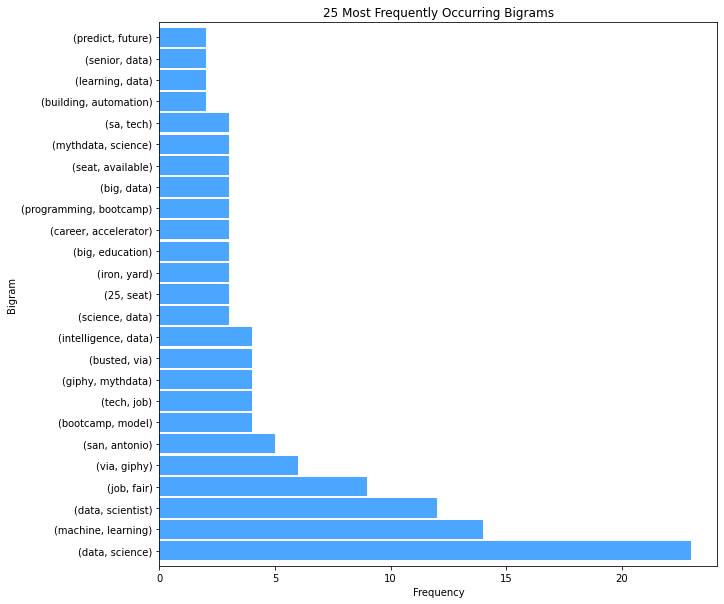

In [53]:
bigrams.plot.barh(color='dodgerblue', width=.9, figsize=(10, 10), alpha=.8)
plt.title('25 Most Frequently Occurring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

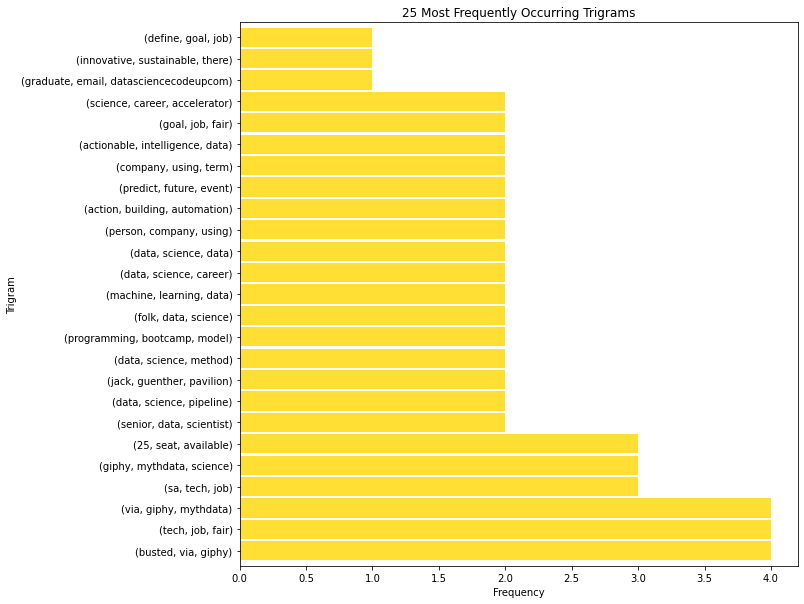

In [54]:
trigrams.plot.barh(color='gold', width=.9, figsize=(10, 10), alpha=.8)
plt.title('25 Most Frequently Occurring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

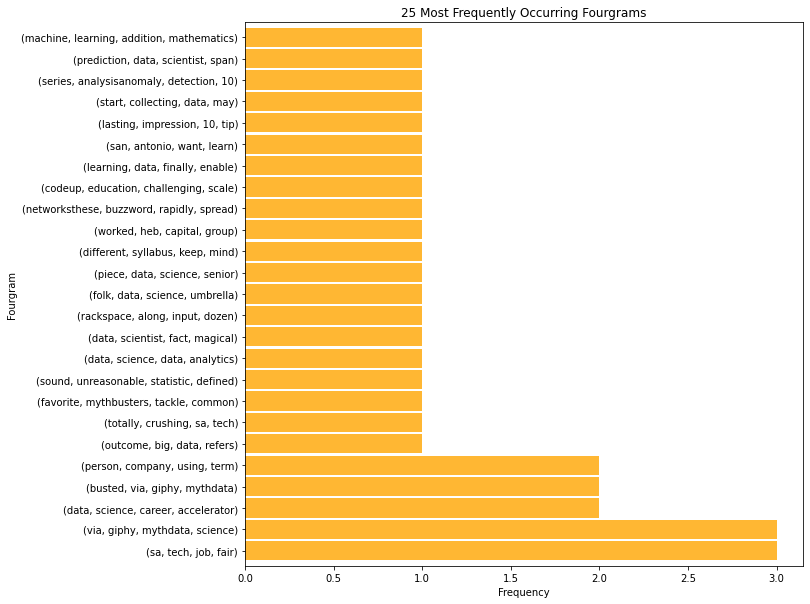

In [55]:
fourgrams.plot.barh(color='orange', width=.9, figsize=(10, 10), alpha=.8)
plt.title('25 Most Frequently Occurring Fourgrams')
plt.ylabel('Fourgram')
plt.xlabel('Frequency')

{'data science': 23, 'machine learning': 14, 'data scientist': 12, 'job fair': 9, 'via giphy': 6, 'san antonio': 5, 'bootcamp model': 4, 'tech job': 4, 'giphy mythdata': 4, 'busted via': 4, 'intelligence data': 4, 'science data': 3, '25 seat': 3, 'iron yard': 3, 'big education': 3, 'career accelerator': 3, 'programming bootcamp': 3, 'big data': 3, 'seat available': 3, 'mythdata science': 3, 'sa tech': 3, 'building automation': 2, 'learning data': 2, 'senior data': 2, 'predict future': 2}


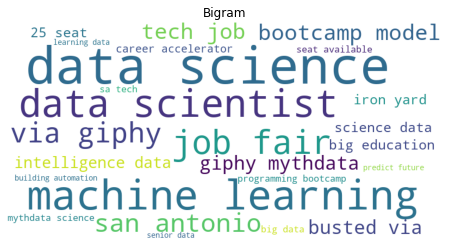

In [62]:
bg = {k[0] + ' ' + k[1]: v for k, v in bigrams.to_dict().items()}
img4 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(bg)
plt.figure(figsize=(8, 4))
plt.imshow(img4)
plt.title('Bigram')
plt.axis('off')
print(bg)

{'busted via giphy': 4, 'tech job fair': 4, 'via giphy mythdata': 4, 'sa tech job': 3, 'giphy mythdata science': 3, '25 seat available': 3, 'senior data scientist': 2, 'data science pipeline': 2, 'jack guenther pavilion': 2, 'data science method': 2, 'programming bootcamp model': 2, 'folk data science': 2, 'machine learning data': 2, 'data science career': 2, 'data science data': 2, 'person company using': 2, 'action building automation': 2, 'predict future event': 2, 'company using term': 2, 'actionable intelligence data': 2, 'goal job fair': 2, 'science career accelerator': 2, 'graduate email datasciencecodeupcom': 1, 'innovative sustainable there': 1, 'define goal job': 1}


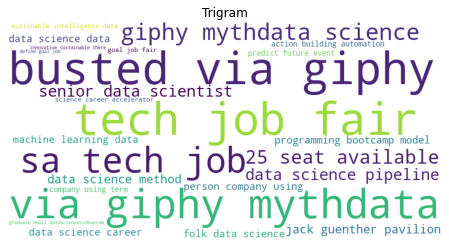

In [65]:
tg = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in trigrams.to_dict().items()}
img5 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(tg)
plt.figure(figsize=(8, 4))
plt.imshow(img5)
plt.title('Trigram')
plt.axis('off')
print(tg)

{'sa tech job fair': 3, 'via giphy mythdata science': 3, 'data science career accelerator': 2, 'busted via giphy mythdata': 2, 'person company using term': 2, 'outcome big data refers': 1, 'totally crushing sa tech': 1, 'favorite mythbusters tackle common': 1, 'sound unreasonable statistic defined': 1, 'data science data analytics': 1, 'data scientist fact magical': 1, 'rackspace along input dozen': 1, 'folk data science umbrella': 1, 'piece data science senior': 1, 'different syllabus keep mind': 1, 'worked heb capital group': 1, 'networksthese buzzword rapidly spread': 1, 'codeup education challenging scale': 1, 'learning data finally enable': 1, 'san antonio want learn': 1, 'lasting impression 10 tip': 1, 'start collecting data may': 1, 'series analysisanomaly detection 10': 1, 'prediction data scientist span': 1, 'machine learning addition mathematics': 1}


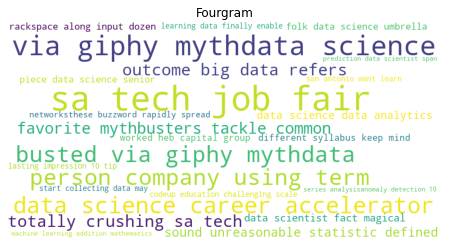

In [67]:
fg = {k[0] + ' ' + k[1] + ' ' + k[2] + ' ' + k[3]: v for k, v in fourgrams.to_dict().items()}
img6 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(fg)
plt.figure(figsize=(8, 4))
plt.imshow(img6)
plt.title('Fourgram')
plt.axis('off')
print(fg)